### **Santander Customer Transaction Prediction**

### Introduction about the problem
At Santander, the mission is to help people and businesses prosper. We are always looking
for ways to help our customers understand their financial health and identify which
products and services might help them achieve their monetary goals.

Our data science team is continually challenging our machine learning algorithms,
working with the global data science community to make sure we can more accurately
identify new ways to solve our most common challenge, binary classification problems
such as: is a customer satisfied? Will a customer buy this product? Can a customer pay
this loan?

In this challenge, we need to identify which customers will make a specific transaction in
the future, irrespective of the amount of money transacted.


dataset: https://www.kaggle.com/lakshmi25npathi/santander-customer-transaction-prediction-dataset

### Overview
1. **Exploratory Data Analysis (EDA)**

    * Handle Missing Values
    * Data pre-processing

2. **Feature Selection**
    * Variance Thereshold Techniques
    * Correlation Techniques
    * Information gain Techniques

4. **Dimensionality Reduction**
    * PCA (Principal Component Analysis)
    * SVD (Singular Value Decomposition)

4. **ANN Modeling**
    * Deep NN Modeling
    * Hyper parameter tuning such as Hidden Layer and Hidden Neurons

5. **Conclussion**


In [139]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import seaborn as sns
import string 
import re
import warnings
import nltk
import numpy as np
warnings.filterwarnings("ignore")


In [141]:
url='/content/drive/MyDrive/Santander (1).csv'
data=pd.read_csv(url)

In [142]:
#Read the dataset
data.head()

,Unnamed: 0,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170,0
1,2,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,300.0,122.22,300.0,240.75,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030,0
2,3,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3.00,2.07,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770,0
3,4,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,0.0,195.0,195.0,0.0,0.0,195.0,0.0,0.0,195.0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,91.56,138.84,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970,0
4,5,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,...,40501.08,13501.47,0.0,0.0,0.0,0.0,0.0,0.0,85501.89,85501.89,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979,0


In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 372 entries, Unnamed: 0 to TARGET
dtypes: float64(89), int64(283)
memory usage: 28.4 MB


Dataset has 372 features and 10,000 obseravation.So, we have to do some feature selection techniques and try to reduce the features. It will help to reduce overfitting 

Drop first two features suchas ID and "0" columns

In [144]:
df=data.iloc[:,2:]

In [145]:
df.describe()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.0,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.0,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,1.000000e+04,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.0,10000.0,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,-697.290500,33.286200,103.577532,74.301786,127.464021,6.700176,11.824926,0.609000,0.924000,6.214374,67.601610,115.639095,61.513404,105.334494,128.901726,62.122404,106.258494,135.116100,5.389200,0.011100,0.004600,0.0,0.0,0.958400,0.660600,0.000200,0.0001,0.032400,0.027300,0.067600,0.046900,0.052700,0.042300,0.040800,0.011200,0.011000,0.0,0.0,0.051100,0.022700,...,1029.096222,996.827523,43.254261,18.943398,93.927417,83.56428,4.352380e+03,787.711911,6.004027e+03,4610.245872,3794.712258,587.434329,5005.921770,3962.160852,855.783123,195.300201,1006.869564,779.918619,0.0,0.0,0.0,0.0,7.698855,0.011904,26.350428,19.641414,0.48387,0.0,0.550833,0.685626,3.377190,1.270416,3.806706,3.011112,15.324084,2.714991,27.227514,20.009280,1.169056e+05,0.038800
std,26449.620836,12.946129,2373.057243,342.390527,579.622179,149.285046,239.343336,28.580077,41.718824,150.077090,301.541818,512.535017,356.107739,576.636154,548.034772,360.214925,584.738201,578.659592,328.611397,0.104775,0.067671,0.0,0.0,0.199683,0.473529,0.014141,0.0100,0.177069,0.162964,0.251071,0.211435,0.223445,0.201283,0.197836,0.105241,0.104308,0.0,0.0,0.220213,0.148953,...,8476.973819,7406.371173,723.463400,938.155074,1207.961570,978.56513,3.486298e+04,12413.940844,4.241944e+04,32396.490245,27839.670648,7309.021695,32979.801596,26566.241625,13234.948816,4354.811521,14301.153484,11129.334100,0.0,0.0,0.0,0.

In [146]:
df.isna().sum()

var3                       0
var15                      0
imp_ent_var16_ult1         0
imp_op_var39_comer_ult1    0
imp_op_var39_comer_ult3    0
                          ..
saldo_medio_var44_hace3    0
saldo_medio_var44_ult1     0
saldo_medio_var44_ult3     0
var38                      0
TARGET                     0
Length: 370, dtype: int64

In [147]:
for i in df.columns:
  if df[i].isna().any()=='True':
    print(i)
  else:
    continue
print("There is no any Null value in our dataset")

There is no any Null value in our dataset


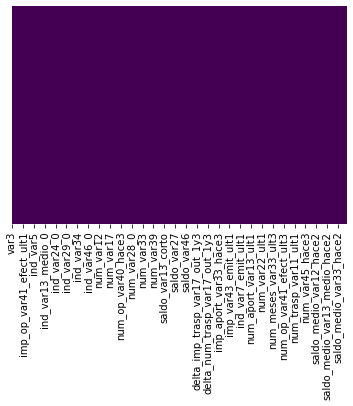

In [148]:
sns.heatmap(df.isna(),yticklabels=False,cbar=False,cmap='viridis')

**By Visiualizing heat map we could see there is no null valy present in the dataset.**

In [149]:
# Convert dependent column as factor variable
data['TARGET'].astype(object)

0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    0
9997    0
9998    0
9999    0
Name: TARGET, Length: 10000, dtype: object

Text(0.5, 1.0, 'Dependent variable distribution')

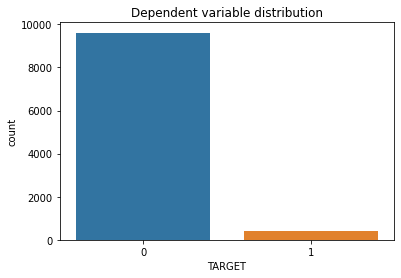

In [150]:
sns.countplot(data['TARGET'])
plt.title("Dependent variable distribution")

By, seeing distribution of the dependent column , we could see there is imbalance among the factor.

In [151]:
#Find the object features in data set
df_categorical = df.select_dtypes(exclude = "number")
print(df_categorical)

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[10000 rows x 0 columns]


In [152]:
for i in df.columns:
  if df[i].dtypes=='object':
    print(i)
  else:
    continue
print("There is no object variable in data set")

There is no object variable in data set


So, in dataset we have 300 features. So, we have to do dimensanality reduction for our futher modeleing So, I'm going to apply to techniques which are variance threshold and correlation techniques.

### **Apply the variance threshold**

In [153]:
from sklearn.feature_selection import VarianceThreshold

In [154]:
x=df.drop(labels=["TARGET"],axis=1)
y=df['TARGET']

In [155]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [156]:
var_thresh=VarianceThreshold(threshold=0.0)
var_thresh.fit(x_train)
var_thresh.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [157]:
### Finding non constant features
sum(var_thresh.get_support())

283

In [158]:
constant_columns = [column  for column in x_train.columns
                    if column not in x_train.columns[var_thresh.get_support()]]

print(len(constant_columns))
x_train_va=x_train.drop(labels=constant_columns,axis=1)
x_test_va=x_test.drop(labels=constant_columns,axis=1)

86


### **Feature Selection- With Correlation**

In [159]:
x_train_va.corr()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var19,...,num_venta_var44_ult1,num_var45_hace2,num_var45_hace3,num_var45_ult1,num_var45_ult3,saldo_medio_var5_hace2,saldo_medio_var5_hace3,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
var3,1.000000e+00,-0.009249,0.000812,0.004283,0.004345,0.000915,0.001051,0.000364,0.000417,0.000818,0.004435,0.004445,0.003374,0.003648,0.004602,0.003373,0.003655,0.004586,0.000301,0.002093,0.001396,-0.004208,0.013291,0.000216,0.000216,0.003615,0.003350,0.005185,0.004291,0.004647,0.004097,0.004028,0.002168,0.002146,0.004580,0.002932,0.001440,0.000717,0.000612,0.001146,...,0.000374,0.001973,0.005637,0.005999,0.005151,0.002288,0.002135,0.000842,0.000858,0.001193,0.000431,0.001571,0.001766,0.002355,0.001198,0.002716,0.002718,0.002649,0.001475,0.002934,0.002891,0.001263,0.000922,0.001385,0.001383,0.000347,0.000216,0.000422,0.000479,0.000216,0.000216,0.000363,0.000379,0.000381,0.000398,0.000543,0.000342,0.000625,0.000623,-7.099848e-09
var15,-9.249444e-03,1.000000,0.032098,0.116459,0.119892,0.061119,0.072982,0.017091,0.017991,0.061144,0.100999,0.100669,0.085555,0.090042,0.107308,0.086163,0.090622,0.118820,0.034679,0.104642,0.075051,-0.113368,-0.104394,0.018546,0.018546,0.109191,0.101462,0.275203,0.228758,0.320515,0.254184,0.249629,0.204716,0.206506,0.317008,0.163141,0.057952,0.028366,0.034547,0.068048,...,0.007319,0.212622,0.247901,0.156020,0.237318,0.192855,0.189337,0.131302,0.186231,0.047155,0.024123,0.054559,0.067336,0.182141,0.091394,0.212637,0.209172,0.201528,0.106486,0.223626,0.220188,0.129131,0.098692,0.144759,0.145603,-0.003850,-0.001217,0.014409,0.019326,0.018546,0.018546,0.025220,0.023281,0.025575,0.025947,0.022513,0.030571,0.023831,0.022977,-7.437591e-03
imp_ent_var16_ult1,8.122305e-04,0.032098,1.000000,0.018048,0.015996,0.010105,0.007661,-0.000788,-0.000902,0.009994,0.015310,0.014468,0.016487,0.016210,0.017791,0.016277,0.016091,0.019660,-0.000650,0.003252,0.005135,-0.003463,0.011129,0.037877,0.037877,0.005510,0.007071,0.025729,0.033547,0.052397,0.058921,0.060027,-0.001151,-0.001066,0.053283,0.008490,0.025207,-0.000008,0.000486,-0.002476,...,-0.000809,0.027885,0.013384,0.037698,0.032564,0.002026,0.002695,0.006679,0.003195,0.012863,-0.000927,0.008320,0.012119,0.009639,-0.001790,0.022133,0.020503,-0.004237,-0.003186,0.037910,0.047515,-0.001430,0.000018,-0.001777,-0.001677,-0.000500,-0.000467,0.003287,0.002198,0.037877,0.037877,-0.000748,-0.000738,-0.000789,-0.000818,-0.001174,-0.000739,-0.001350,-0.001346,9.961870e-04
imp_op_var39_comer_ult1,4.283400e-03,0.116459,0.018048,1.000000,0.872957,0.495767,0.446260,0.050206,0.064739,0.437952,0.882945,0.775534,0.346852,0.380360,0.702126,0.34778

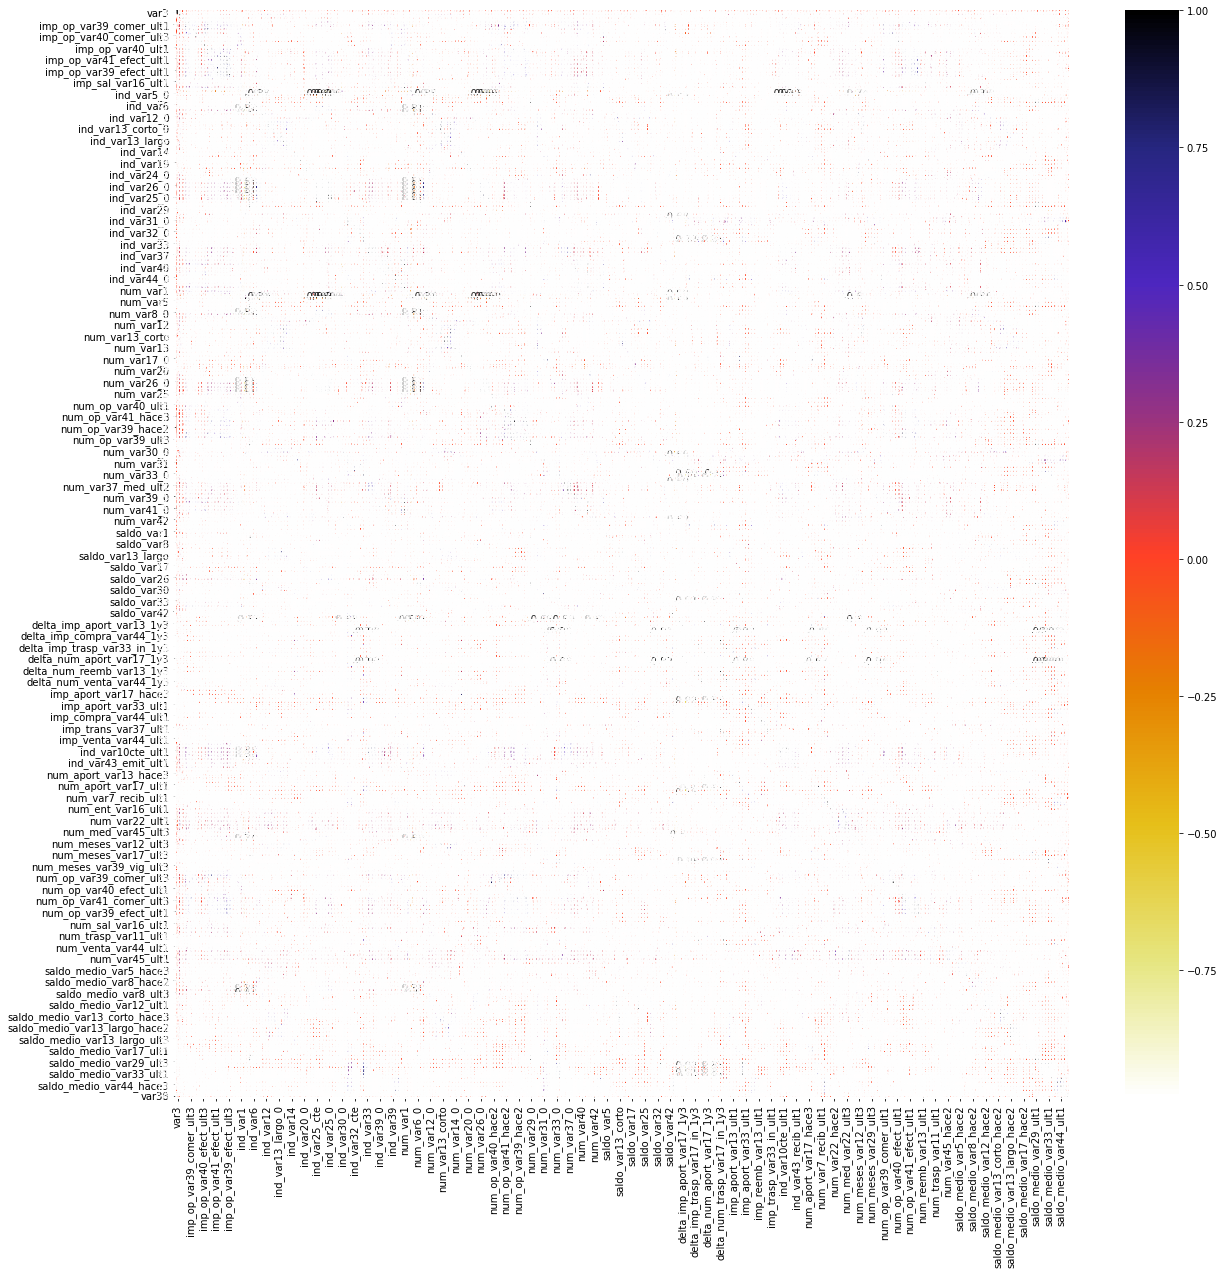

In [160]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(20,20))
cor = x_train_va.corr()
sns.heatmap(cor,annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [161]:
#Define the own function for find the correlation for each features 
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

**Remove the features, where it has correlation greater the 0.85**

In [162]:
cor_feature=correlation(x_train_va,0.85)
len(cor_feature)

181

**Applying to the test data set and drop the correlation features among them**

In [163]:
x_test_corr = x_test_va.drop(cor_feature,axis=1)
x_train_corr = x_train_va.drop(cor_feature,axis=1)

In [164]:
for i in x_train_va.columns:
  print(x_train_va[i].value_counts())

 2         7827
 0           13
 4           12
 8           12
 5           12
 3           11
 9           11
 10           9
 6            7
 14           7
 7            7
 11           6
 13           6
 1            5
-999999       3
 16           3
 22           3
 137          2
 114          2
 15           2
 23           2
 12           2
 148          1
 120          1
 104          1
 84           1
 72           1
 28           1
 17           1
 33           1
 49           1
 53           1
 89           1
 121          1
 129          1
 187          1
 141          1
 177          1
 127          1
 115          1
 107          1
 31           1
 178          1
 174          1
 158          1
 146          1
 138          1
 110          1
 94           1
 66           1
 58           1
 30           1
 18           1
 191          1
 131          1
 209          1
 197          1
 219          1
Name: var3, dtype: int64
23     2110
24      632
25      437
26      347

### **Build ANN hidden layer**

In [165]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
import keras
from keras import layers
from keras import models
from keras import utils
from keras.layers import Dense

from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Activation
from keras import datasets
from keras.callbacks import LearningRateScheduler
from keras.callbacks import History
from keras import losses
from sklearn.utils import shuffle

### Feature Scaling

In [166]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x_train=sc.fit_transform(x_train_corr)
x_test=sc.transform(x_test_corr)

### **Develop DNN** 

In [167]:
model=Sequential()
# Firstly, we will develop the input layer 
model.add(Dense(x_train.shape[1],activation="relu",kernel_initializer = 'he_normal',bias_initializer='zeros'))
model.add(Dropout(0.2))
# Hidden Layer
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.2))
#Out put layer
model.add(Dense(1,activation="sigmoid"))

In [168]:
model.compile(optimizer="adamax",loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x=x_train,y=y_train,batch_size=10,epochs=50,verbose=1)

Epoch 1/50
800/800 [==============================] - 2s 2ms/step - loss: 0.2225 - accuracy: 0.9454
Epoch 2/50
800/800 [==============================] - 2s 2ms/step - loss: 0.1746 - accuracy: 0.9577
Epoch 3/50
800/800 [==============================] - 1s 2ms/step - loss: 0.1663 - accuracy: 0.9563
Epoch 4/50
800/800 [==============================] - 1s 2ms/step - loss: 0.1453 - accuracy: 0.9623
Epoch 5/50
800/800 [==============================] - 1s 2ms/step - loss: 0.1435 - accuracy: 0.9631
Epoch 6/50
800/800 [==============================] - 1s 2ms/step - loss: 0.1424 - accuracy: 0.9598
Epoch 7/50
800/800 [==============================] - 1s 2ms/step - loss: 0.1527 - accuracy: 0.9563
Epoch 8/50
800/800 [==============================] - 1s 2ms/step - loss: 0.1445 - accuracy: 0.9598
Epoch 9/50
800/800 [==============================] - 2s 2ms/step - loss: 0.1393 - accuracy: 0.9600
Epoch 10/50
800/800 [==============================] - 1s 2ms/step - loss: 0.1490 - accuracy: 0.9578

In [169]:
pred_y=model.predict_classes(x_test)


In [170]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred_y)
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,pred_y)
print(cm)
print(score)

[[1928    2]
 [  68    2]]
0.965


**So, we could see accuracy of the test data set is around 96%. So, now we will see how to tune Hidden layer and Number of Neuron for the DNN.**

### **Hyperparameter Tuning for Hidden layer and Neurons**

In [ ]:
!pip install -U keras-tuner

In [172]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras import initializers
from kerastuner.tuners import RandomSearch
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout

### **Build own functon for Find the Hidden layer and Neurons** 

In [173]:

def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu',bias_initializer='zeros'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [174]:

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='project',
    project_name='Santander Customer Transaction')

INFO:tensorflow:Reloading Oracle from existing project project/Santander Customer Transaction/oracle.json
INFO:tensorflow:Reloading Tuner from project/Santander Customer Transaction/tuner0.json


In [175]:
# Finf the summary of the Tuner model
tuner.search_space_summary()

Search space summary
Default search space size: 15
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_6 (Int)
{'default': None, 'co

In [176]:
tuner.search(x_train, y_train,
             epochs=5,
             validation_data=(x_test, y_test))

INFO:tensorflow:Oracle triggered exit


In [177]:
 tuner.get_best_models(num_models=1)


In [178]:
tuner.results_summary()

Results summary
Results in project/Santander Customer Transaction
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
num_layers: 2
units_0: 384
units_1: 64
learning_rate: 0.0001
Score: 0.9661666750907898
Trial summary
Hyperparameters:
num_layers: 13
units_0: 288
units_1: 256
learning_rate: 0.0001
units_2: 224
units_3: 416
units_4: 128
units_5: 288
units_6: 128
units_7: 64
units_8: 416
units_9: 352
units_10: 128
units_11: 224
units_12: 32
Score: 0.9653333226839701
Trial summary
Hyperparameters:
num_layers: 11
units_0: 64
units_1: 416
learning_rate: 0.01
units_2: 448
units_3: 160
units_4: 384
units_5: 224
units_6: 64
units_7: 160
units_8: 192
units_9: 160
units_10: 480
units_11: 480
units_12: 320
Score: 0.9649999737739563
Trial summary
Hyperparameters:
num_layers: 12
units_0: 256
units_1: 480
learning_rate: 0.01
units_2: 32
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
units_8: 32
units_9: 32
units_10: 32
units_11: 32
Score

### We could see after tuning the hidden layes and Neurons, we got same accuracy as befor. So, we will try in differnt way to incrase accuracy.

1. Handle Imbalanced dataset
2. Apply Information Gain techniques to reduce the features
3. PCA

### **PCA(Principle Component Analysis)**

PCA as an unsupervised linear dimensionality reduction technique that helps us identify patterns in data based of the correlation between the features.

PCA aims to find the directions of the maximum variance in high dimensional data and project it onto a lower dimensional feature space.

In [196]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components=10)
# X_train = pca.fit_transform(x_train)
# X_test = pca.transform(x_test)
# sc=StandardScaler()
# x_train=sc.fit_transform(x_train_corr)
# x_test=sc.transform(x_test_corr)
from sklearn.decomposition import TruncatedSVD
svd=TruncatedSVD(n_components=20)
X_train = svd.fit_transform(x_train_corr)
X_test = svd.transform(x_test_corr)
x_train=sc.fit_transform(X_train)
x_test=sc.transform(X_test)

In [197]:
x_train.shape

(8000, 20)

In [198]:
model=Sequential()
# Firstly, we will develop the input layer 
model.add(Dense(X_train.shape[1],activation="relu",kernel_initializer = 'he_normal',bias_initializer='zeros'))
model.add(Dropout(0.2))
# Hidden Layer
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.2))
#Out put layer
model.add(Dense(1,activation="sigmoid"))
model.compile(optimizer="adamax",loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x=X_train,y=y_train,batch_size=10,epochs=20,verbose=1)

Epoch 1/20
800/800 [==============================] - 2s 2ms/step - loss: 270.3571 - accuracy: 0.9320
Epoch 2/20
800/800 [==============================] - 1s 2ms/step - loss: 3324.6331 - accuracy: 0.9212
Epoch 3/20
800/800 [==============================] - 1s 2ms/step - loss: 15927.7476 - accuracy: 0.9300
Epoch 4/20
800/800 [==============================] - 1s 2ms/step - loss: 33.7883 - accuracy: 0.9213
Epoch 5/20
800/800 [==============================] - 1s 2ms/step - loss: 27.3986 - accuracy: 0.9167
Epoch 6/20
800/800 [==============================] - 1s 2ms/step - loss: 558.1801 - accuracy: 0.9219
Epoch 7/20
800/800 [==============================] - 1s 2ms/step - loss: 7561.8727 - accuracy: 0.9162
Epoch 8/20
800/800 [==============================] - 1s 2ms/step - loss: 7.2969 - accuracy: 0.9079
Epoch 9/20
800/800 [==============================] - 1s 2ms/step - loss: 162.8343 - accuracy: 0.9170
Epoch 10/20
800/800 [==============================] - 1s 2ms/step - loss: 1088.36

In [199]:
pred_y=model.predict_classes(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred_y)
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,pred_y)
print(cm)
print(score)

[[1930    0]
 [  70    0]]
0.965


### **Information gain**

In [200]:
from sklearn.feature_selection import mutual_info_classif
impo= mutual_info_classif(x_train_corr,y_train)
fea_imp=pd.Series(impo)
fea_imp.index=x_train_corr.columns
fea_values=fea_imp.sort_values(ascending=False)

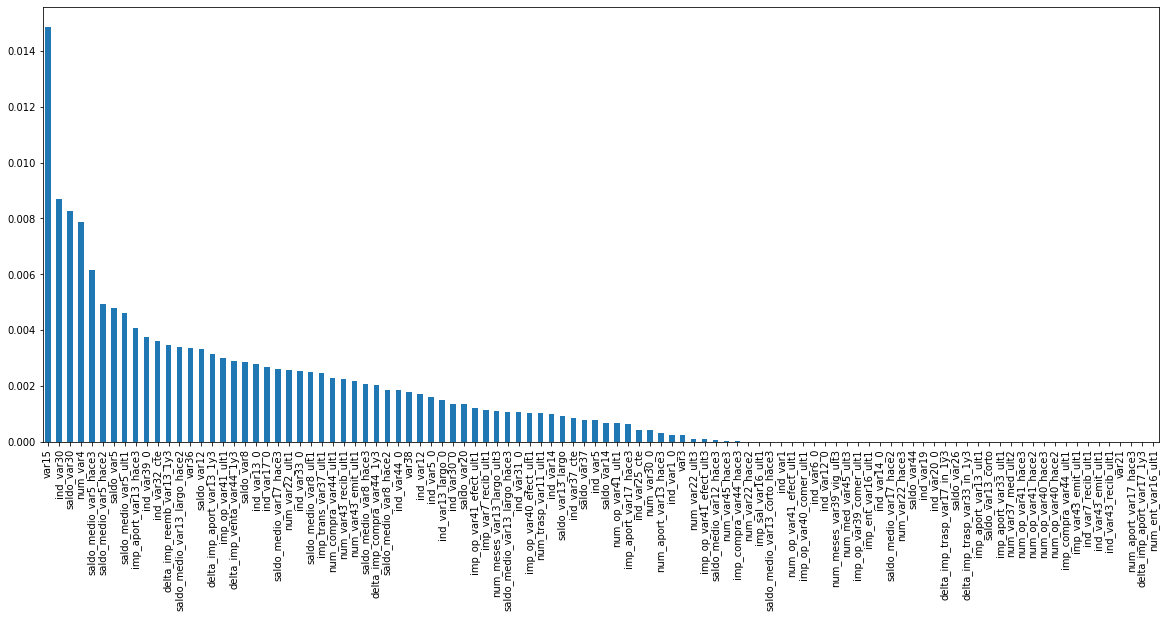

In [201]:
#let's plot the ordered mutual_info values per feature
fea_imp.sort_values(ascending=False).plot.bar(figsize=(20, 8))

### **Feature important Values**

In [202]:
fea_values

var15                        0.014842
ind_var30                    0.008709
saldo_var30                  0.008253
num_var4                     0.007878
saldo_medio_var5_hace3       0.006135
                               ...   
ind_var43_recib_ult1         0.000000
var21                        0.000000
num_aport_var17_hace3        0.000000
delta_imp_aport_var17_1y3    0.000000
num_ent_var16_ult1           0.000000
Length: 102, dtype: float64

### **Find the Non-Important features**

In [203]:
non_import_column=[]
for i in range(len(x_train_corr.columns)):
  if fea_values[i]==0:
    non_import_column.append(x_train_corr.columns[i])

In [204]:
x_train_gain=x_train_corr.drop(non_import_column,axis=1)
x_test_gain=x_test_corr.drop(non_import_column,axis=1)

### **Handle Imbalce dataset to apply Random sampling techniques**.

### **Applying Synthetic Minority Oversampling Technique (SMOTE)**
For re-balance our data we ware going to apply Synthetic Minority Over-sampling Technique (SMOTE). Unlike ROS(Random over sampling), SMOTE does not create exact copies of observations, but creates new, synthetic, samples that are quite similar to the existing observations in the minority class. Also in the real problem we have to apply the sampling techniques to only the trainig data set.

In [205]:
#Import the over sampling module from the imblearn library
from imblearn.over_sampling import SMOTE
#Appling Resampling techniques only the train data set
method=SMOTE(kind='borderline1')
x_train_sample,y_sample=method.fit_sample(x_train_gain,y_train)

In [206]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x_train=sc.fit_transform(x_train_sample)
x_test=sc.transform(x_test_gain)

### **Develop DNN**

In [207]:
model=Sequential()
# Firstly, we will develop the input layer 
model.add(Dense(x_train.shape[1],activation="relu",kernel_initializer = 'he_normal',bias_initializer='zeros'))
model.add(Dropout(0.2))
# Hidden Layer
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.2))
#Out put layer
model.add(Dense(1,activation="sigmoid"))
model.compile(optimizer="adamax",loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x=x_train,y=y_sample,batch_size=10,epochs=30,verbose=1)

Epoch 1/30
1537/1537 [==============================] - 4s 2ms/step - loss: 0.5265 - accuracy: 0.7561
Epoch 2/30
1537/1537 [==============================] - 3s 2ms/step - loss: 0.4254 - accuracy: 0.8069
Epoch 3/30
1537/1537 [==============================] - 3s 2ms/step - loss: 0.4081 - accuracy: 0.8205
Epoch 4/30
1537/1537 [==============================] - 3s 2ms/step - loss: 0.3955 - accuracy: 0.8282
Epoch 5/30
1537/1537 [==============================] - 3s 2ms/step - loss: 0.3852 - accuracy: 0.8338
Epoch 6/30
1537/1537 [==============================] - 3s 2ms/step - loss: 0.3768 - accuracy: 0.8455
Epoch 7/30
1537/1537 [==============================] - 3s 2ms/step - loss: 0.3717 - accuracy: 0.8482
Epoch 8/30
1537/1537 [==============================] - 3s 2ms/step - loss: 0.3711 - accuracy: 0.8472
Epoch 9/30
1537/1537 [==============================] - 3s 2ms/step - loss: 0.3473 - accuracy: 0.8571
Epoch 10/30
1537/1537 [==============================] - 3s 2ms/step - loss: 0.360

In [208]:
pred_y=model.predict_classes(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred_y)
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,pred_y)
print(cm)
print(score)

[[1610  320]
 [  35   35]]
0.8225


### Conclusion

After appling PCA and SVD, There is no much change in the testing Accuracy. And also, resampling techniques and information gain techniques has been reduced the accuracy of the test data. So, our best accuracy around 96%